## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import time
import requests
from bs4 import BeautifulSoup
import requests
from tqdm import tqdm
import pickle


### Api Key

In [2]:
client_id = 'hQmW_N-oAuBKvmHmmF5Ltg'
api_key = '-xfnZF7NwPGrMpJUEY99Oc9hL_zP4B8l5oB7OYkTsHsl1FsfAteGNT_uHWay_CFD_a90yoD7bvqgugeJmQq_iyu0K9Ks1n8_zzEiskRRQQHdO3xXFemvf2loxA07XXYx'

## Helper Functions

In [3]:
#api calls
def yelp_call(url_params, api_key):

    url = 'https://api.yelp.com/v3/businesses/search'
    headers = {'Authorization': 'Bearer {}'.format(api_key)}
    response = requests.get(url, headers=headers, params=url_params)
    data = response.json()['businesses']
    return data

In [4]:
#API call for 1000 restaurants
def all_results(url_params, api_key):
    url = 'https://api.yelp.com/v3/businesses/search'
    headers = {'Authorization': 'Bearer {}'.format(api_key)}
    response = requests.get(url, headers=headers, params=url_params)
    num = response.json()['total']
    print('{} total matches found.'.format(num))
    cur = 0
    results = []
    while cur < num and cur < 1000:
        url_params['offset'] = cur
        results.append(yelp_call(url_params, api_key))
#         time.sleep(1) #Wait a second
        cur += 50
    return results

In [28]:
#Params
term = 'Restaurants'
location = '10461'
radius = 20000
url_params = {  'term': term.replace(' ', '+'),
                'location': location.replace(' ', '+'),
                'limit' : 50,
                'radius': radius
             }

In [29]:
## API Call for 1000 Restaurants

In [30]:
#Getting info using function created previously
all_restaurants = all_results(url_params, api_key)
print(len(all_restaurants))

7600 total matches found.
20


In [31]:
all_restaurants[0][0]

{'id': 'ba-MPbYnM6T30RNgPdUvtQ',
 'alias': 'shanghai-red-asian-latin-bistro-bronx-2',
 'name': 'Shanghai Red Asian Latin Bistro',
 'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/Ygm5bjAuAhWOhhafsmwKgA/o.jpg',
 'is_closed': False,
 'url': 'https://www.yelp.com/biz/shanghai-red-asian-latin-bistro-bronx-2?adjust_creative=hQmW_N-oAuBKvmHmmF5Ltg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=hQmW_N-oAuBKvmHmmF5Ltg',
 'review_count': 54,
 'categories': [{'alias': 'asianfusion', 'title': 'Asian Fusion'}],
 'rating': 4.0,
 'coordinates': {'latitude': 40.8401620296024, 'longitude': -73.8425095552948},
 'transactions': ['pickup', 'restaurant_reservation', 'delivery'],
 'price': '$$',
 'location': {'address1': '127 Westchester Sq',
  'address2': '',
  'address3': None,
  'city': 'Bronx',
  'zip_code': '10461',
  'country': 'US',
  'state': 'NY',
  'display_address': ['127 Westchester Sq', 'Bronx, NY 10461']},
 'phone': '+17186846262',
 'display_phone': '(718) 684-626

## Parse API Data for Relevant Info

In [32]:
#function to parse the data and keep only the parts of each entry that we need
def parse_api(data):
    parsed_data = []
    final_parsed_restaurants = []
    for i in range(len(data)):
        for j in range(50):
            parsed_data.append(data[i][j])
    
    #create a list with SQL tables columnns names
    for parsed_restaurant in parsed_data:
        if 'price' in parsed_restaurant.keys():
            final_parsed_restaurants.append({'restaurant_id': parsed_restaurant['id'],'restaurant_name': parsed_restaurant['name'],
                         'price': parsed_restaurant['price'],'rating': parsed_restaurant['rating'],
                         'review_count': parsed_restaurant['review_count']})
        else:
            final_parsed_restaurants.append({'restaurant_id': parsed_restaurant['id'],'restaurant_name': parsed_restaurant['name'],
                         'price': "",'rating': parsed_restaurant['rating'],
                         'review_count': parsed_restaurant['review_count']})
    return final_parsed_restaurants

In [33]:
#call the function and return a list with only the columns names we need
parsed_restaurants_v1 = parse_api(all_restaurants)

In [34]:
len(parsed_restaurants_v1)

1000

In [35]:
parsed_restaurants_v1

[{'restaurant_id': 'ba-MPbYnM6T30RNgPdUvtQ',
  'restaurant_name': 'Shanghai Red Asian Latin Bistro',
  'price': '$$',
  'rating': 4.0,
  'review_count': 54},
 {'restaurant_id': 'P8PGGzxZeMm6Na5gYqvudw',
  'restaurant_name': 'Travesias',
  'price': '$$',
  'rating': 4.0,
  'review_count': 468},
 {'restaurant_id': 'b6jOwyX4iaagw8YjXqq1sA',
  'restaurant_name': "Antonio's Trattoria",
  'price': '$$',
  'rating': 4.5,
  'review_count': 743},
 {'restaurant_id': '2f-qNpdVJl2h9L6SHYuICA',
  'restaurant_name': 'Havana Cafe',
  'price': '$$',
  'rating': 4.0,
  'review_count': 765},
 {'restaurant_id': 'm6p_huTMlmMvUNkxDL1YCQ',
  'restaurant_name': 'Havana Cafe',
  'price': '$$',
  'rating': 4.0,
  'review_count': 172},
 {'restaurant_id': 'DLnn2qw-KJAmazB-hMmSEw',
  'restaurant_name': 'The Hill Bistro',
  'price': '$$',
  'rating': 4.5,
  'review_count': 168},
 {'restaurant_id': 'ZZxYVgodx2TxbYwh-0YU1w',
  'restaurant_name': 'Taqueria Tlaxcalli',
  'price': '$$',
  'rating': 4.5,
  'review_count

In [36]:
df = pd.DataFrame.from_dict(parsed_restaurants_v1)

In [37]:
df.head()

,price,rating,restaurant_id,restaurant_name,review_count
0,$$,4.0,ba-MPbYnM6T30RNgPdUvtQ,Shanghai Red Asian Latin Bistro,54
1,$$,4.0,P8PGGzxZeMm6Na5gYqvudw,Travesias,468
2,$$,4.5,b6jOwyX4iaagw8YjXqq1sA,Antonio's Trattoria,743
3,$$,4.0,2f-qNpdVJl2h9L6SHYuICA,Havana Cafe,765
4,$$,4.0,m6p_huTMlmMvUNkxDL1YCQ,Havana Cafe,172


In [38]:
#exporting data to excel for partner to use
df.to_excel("Restaurant_Bronx.xlsx")

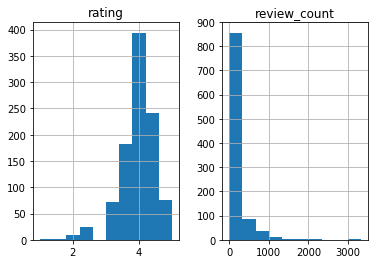

In [39]:
df.hist()
plt.show()

### Prepping for Full Scrape

In [ ]:
df = pd.read_csv('Restaurant_Bronx.xlsx')

In [16]:
restaurant_id_list = list(df.restaurant_id)

In [17]:
restaurant_id_list

['b6jOwyX4iaagw8YjXqq1sA',
 'P8PGGzxZeMm6Na5gYqvudw',
 'DLnn2qw-KJAmazB-hMmSEw',
 'KAxYFGyOQ7ysCmYmh8jKtw',
 'T_72OxeFKvdzX-mKEztHdQ',
 'D8z7FS2SB48zTjvch4bc0g',
 'KNEDp6x3J6lSK-8HD-pGIQ',
 '2f-qNpdVJl2h9L6SHYuICA',
 'ba-MPbYnM6T30RNgPdUvtQ',
 'g_Zz87qghqq9bKHiKyws0w',
 'ZZxYVgodx2TxbYwh-0YU1w',
 'tLZfepIfSf0a80zHQTbTGQ',
 'IrDzCy5zbVGlw9OuP15Izw',
 't1_qBEjXscQn-mp6-or_sw',
 'm6p_huTMlmMvUNkxDL1YCQ',
 'ciHt5n5rmpby1YcC_6JVrg',
 'YmAPpKeMuly7IIjpYcFhHw',
 '03RL_VcRGXuICl2R6Luu_Q',
 '3uyBZNbDk2vRFBBWZOdIUA',
 'Lesv5BG0_0-8bB49cAjMkg',
 'fAQVVgDt88mW739YJgKQdQ',
 'rkYATACY4qzaVFapJTWj4Q',
 '_z52AlCKEU2Lc-CB1j6Kaw',
 'By2Zl1imtu0SpA4IBziN1g',
 'BiOgIv7Nj3oDrJTHiDt45g',
 'C3spvfEd8JQJie-yixRgpQ',
 'eQdjZQaLnjItmn9suEEeIA',
 'xAFXagBZ_JbYsAkw-gS-Hg',
 '-5JwknVLIT36YTGhvkuBaw',
 'PerCtK0A27ku-cmBVMh5tw',
 'hLm1vXfAKuSOgAtBA-vO7w',
 'tvsllkjgQqMaa7Z1gUkC3A',
 'RXGa5YeRxilvUQFmbFPopQ',
 '0p6W9PtbvBkOl7VBmUZciw',
 '3xd4L_TdfdhuCjAzJecs6A',
 'phB6HvQyOUEZmvgg9KzRmA',
 'CY1lJBQatCNo4-_ljlS1rA',
 

## Test Scrape for 1 Restaurant

In [18]:
# creating the link to access the reviews
url_prefix = 'https://www.yelp.com/biz/'
url_suffix = '?rh_type=phrase'
test_id = 'b6jOwyX4iaagw8YjXqq1sA'
full_url = url_prefix+test_id+url_suffix

In [19]:
full_url

'https://www.yelp.com/biz/b6jOwyX4iaagw8YjXqq1sA?rh_type=phrase'

In [20]:
source = requests.get(full_url).text

In [21]:
source

'<!DOCTYPE HTML>\n\n<!--[if lt IE 7 ]> <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie6 ie ltie9 ltie8 no-js" lang="en"> <![endif]-->\n<!--[if IE 7 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie7 ie ltie9 ltie8 no-js" lang="en"> <![endif]-->\n<!--[if IE 8 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie8 ie ltie9 no-js" lang="en"> <![endif]-->\n<!--[if IE 9 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie9 ie no-js" lang="en"> <![endif]-->\n<!--[if (gt IE 9)|!(IE)]><!--> <html xmlns:fb="http://www.facebook.com/2008/fbml" class="no-js" lang="en"> <!--<![endif]-->\n    <head>\n        <script>\n            (function() {\n                var main = null;\n\n                var main=function(){window.onerror=function(k,a,c,i,f){var j=(document.getElementsByTagName("html")[0].getAttribute("webdriver")==="true"||navigator.userAgent==="selenium");var h=f&&(f.name==="ServerSideRenderingError"||f.name==="CSRFallbackError");if(

In [22]:
soup = BeautifulSoup(source,'lxml')

In [23]:
print(soup.prettify())

<!DOCTYPE HTML>
<!--[if lt IE 7 ]> <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie6 ie ltie9 ltie8 no-js" lang="en"> <![endif]-->
<!--[if IE 7 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie7 ie ltie9 ltie8 no-js" lang="en"> <![endif]-->
<!--[if IE 8 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie8 ie ltie9 no-js" lang="en"> <![endif]-->
<!--[if IE 9 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie9 ie no-js" lang="en"> <![endif]-->
<!--[if (gt IE 9)|!(IE)]><!-->
<html class="no-js" lang="en" xmlns:fb="http://www.facebook.com/2008/fbml">
 <!--<![endif]-->
 <head>
  <script>
   (function() {
                var main = null;

                var main=function(){window.onerror=function(k,a,c,i,f){var j=(document.getElementsByTagName("html")[0].getAttribute("webdriver")==="true"||navigator.userAgent==="selenium");var h=f&&(f.name==="ServerSideRenderingError"||f.name==="CSRFallbackError");if(j&&!h){document.body.innerHTML=

In [24]:
reviews_section = soup.find(class_='lemon--span__373c0__3997G',lang='en')


In [25]:
reviews_section

<span class="lemon--span__373c0__3997G" lang="en">Love the food in this off Arthur Street spot.  Had chicken sorrentino and Riley had the homemade gnocchi and we shared a cold antipasto.  <br/><br/> Tiramisu and NY cheesecake and coffee for dessert. We will be back for</span>

In [26]:
reviews_section.text

'Love the food in this off Arthur Street spot. \xa0Had chicken sorrentino and Riley had the homemade gnocchi and we shared a cold antipasto. \xa0 Tiramisu and NY cheesecake and coffee for dessert. We will be back for'

In [27]:
all_reviews_section = soup.find_all(class_='lemon--span__373c0__3997G',lang='en')
all_reviews_section

[<span class="lemon--span__373c0__3997G" lang="en">Love the food in this off Arthur Street spot.  Had chicken sorrentino and Riley had the homemade gnocchi and we shared a cold antipasto.  <br/><br/> Tiramisu and NY cheesecake and coffee for dessert. We will be back for</span>,
 <span class="lemon--span__373c0__3997G" lang="en">I was in the Bronx area yesterday and was really craving Italian food. I'm not to familiar with the area so I went to yelp for a good suggestion and ended up finding Antonio's Trattoria. This is such a old fashion Italian restaurant that you need to visit while here. The guy who I believe was the owner was out front in the bar and he seems like the man. <br/><br/>We got situated and they immediately brought out this warm bread which was amazing with olive oil and crushed red pepper. The menu was actually very reasonable in price because I thought it was going to be insanely expensive. <br/><br/>Food was amazing and so classic. Made me feel right at home. If your

## Scrape for All 1000 Restaurants

In [28]:
reviews=[]
for i in range(len(all_reviews_section)):
    reviews.append({i:all_reviews_section[i].text})

In [29]:
reviews

[{0: 'Love the food in this off Arthur Street spot. \xa0Had chicken sorrentino and Riley had the homemade gnocchi and we shared a cold antipasto. \xa0 Tiramisu and NY cheesecake and coffee for dessert. We will be back for'},
 {1: "I was in the Bronx area yesterday and was really craving Italian food. I'm not to familiar with the area so I went to yelp for a good suggestion and ended up finding Antonio's Trattoria. This is such a old fashion Italian restaurant that you need to visit while here. The guy who I believe was the owner was out front in the bar and he seems like the man. We got situated and they immediately brought out this warm bread which was amazing with olive oil and crushed red pepper. The menu was actually very reasonable in price because I thought it was going to be insanely expensive. Food was amazing and so classic. Made me feel right at home. If your looking for that authentic NY Italian feel you have to go through Antonio's."},
 {2: "We came in not knowing what to e

In [31]:
def scrape_list(list_id):
    reviews=[]
    for resto_id in tqdm(list_id):
        url_prefix = 'https://www.yelp.com/biz/'
        url_suffix = ['?rh_type=phrase','?start=20', '?start=40', '?start=60', '?start=80', '?start=100']
        for suf in url_suffix:
            test_id = resto_id
            full_url = url_prefix+test_id+suf
        
            source = requests.get(full_url).text
            soup = BeautifulSoup(source,'html')
            all_reviews_section = soup.find_all(class_='lemon--span__373c0__3997G',lang='en')
            
            for i in range(len(all_reviews_section)):
                reviews.append((test_id,all_reviews_section[i].text))
            with open('reviews_loop3.pkl', 'wb') as f:
                pickle.dump(reviews, f)
    return reviews  

In [32]:
full_reviews = scrape_list(restaurant_id_list)

100%|██████████| 1000/1000 [8:10:57<00:00, 28.45s/it] 


In [34]:
len(full_reviews)

94205

In [35]:
full_reviews

[('jWuUibgnTGsJibOrr6UUSw',
  'I had my first Haidilao experience 18 years ago, to me this remains best hotpot place in the world since then. Even with more and more hotpot brands popping up in China nowadays, I still think Haidilao is THE BEST among them all - the food, the service, the amenities, etc. I was so excited to learn that Haidilao is coming to NYC eventually. My BF made the reservation a month ago and we finally gets to try it today. It is really good, from every aspect.We ordered the soup base with four different flavors, tomato and spicy oil soup base are my all time favorite. The hotpot tastes pretty much like what I had back in China, maybe the tomato soup base is slightly more diluted than what I had in China, but I\'m glad they did not "tailor the flavor" to accompany the US market, which is what happened to their first LA restaurant - yes I went to their first LA restaurant too when it opened and was very disappointed at what they did to make Haidilao "Americanized".

## Save Data

In [36]:
import pickle
 
with open('reviews_v3.pkl', 'wb') as f:
    pickle.dump(full_reviews, f)

In [37]:
data = pd.DataFrame(full_reviews,columns=['Restaurant_Id','Review'])

In [38]:
data.to_csv('reviews_queens.csv')